# EDA

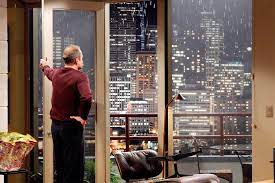

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('data/King_County_House_prices_dataset_cleaned.csv')
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,True,0.000,...,1180,0,1955,0,98178,47.511,-122.257,1340,5650,False
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,False,0.000,...,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,True
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,False,0.000,...,770,0,1933,0,98028,47.738,-122.233,2720,8062,False
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,False,0.000,...,1050,910,1965,0,98136,47.521,-122.393,1360,5000,False
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,False,0.000,...,1680,0,1987,0,98074,47.617,-122.045,1800,7503,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.000,3,2.500,1530,1131,3.000,False,0.000,...,1530,0,2009,0,98103,47.699,-122.346,1530,1509,False
21593,6600060120,2015-02-23,400000.000,4,2.500,2310,5813,2.000,False,0.000,...,2310,0,2014,0,98146,47.511,-122.362,1830,7200,False
21594,1523300141,2014-06-23,402101.000,2,0.750,1020,1350,2.000,False,0.000,...,1020,0,2009,0,98144,47.594,-122.299,1020,2007,False
21595,291310100,2015-01-16,400000.000,3,2.500,1600,2388,2.000,True,0.000,...,1600,0,2004,0,98027,47.535,-122.069,1410,1287,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  bool          
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

# Column Names and descriptions for King County Data Set
|Column|Description|my info
|---|---|---|
**id** | unique identified for a house | unique? False: 21420, True: 177
**dateDate** | house was sold | date √
**pricePrice** | is prediction target
**bedroomsNumber** | # of bedrooms | array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])
**bathroomsNumber** | # of bathrooms | 29 continous numbers. Why?!
**sqft_livingsquare** | footage of the home | int
**sqft_lotsquare** | footage of the lot | int
**floorsTotal** | floors (levels) in house | array([1. , 2. , 1.5, 3. , 2.5, 3.5])
**waterfront** | House which has a view to a waterfront | NaN!! array([nan,  0.,  1.]) -> True/False √
**view** | quality of view | array([ 0., nan,  3.,  4.,  2.,  1.])
**condition** | How good the condition is ( Overall ) | array([3, 5, 4, 1, 2])
**grade** | overall grade given to the housing unit, based on King County grading system| array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])
**sqft_above** | square footage of house apart from basement | int
**sqft_basement** | square footage of the basement| NaN!! float -> calc new, int √
**yr_built** | Built Year | int -> date (year) ?
**yr_renovated** | Year when house was renovated | NaN! -> date (year) ?
**zipcode** | zip | int, nunique: 70
**lat** | Latitude coordinate | useful?
**long** | Longitude coordinate | useful?
**sqft_living15** | The square footage of interior housing living space for the nearest 15 neighbors | int (do I need that?)
**sqft_lot15** | The square footage of the land lots of the nearest 15 neighbors | int (do I need that?)

sqft_above

What do I searching for?  

* 1 house in the city center, 2 people, fast
* 1 house in the country, non-renovated, best timing  


How do I find that?

zipcode -> price, sqft_15 gives how big the houses and the garden is in the area

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated'],
      dtype='object')

some new columns, price/sqft_living, price/(sqft_living+sqft_lot)

In [5]:
df.eval("price_per_sqft_liv = price/sqft_living", inplace=True)


In [6]:
df.eval("price_per_sqft_all = price/(sqft_living + sqft_lot)", inplace=True)

In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'price_per_sqft_liv', 'price_per_sqft_all'],
      dtype='object')

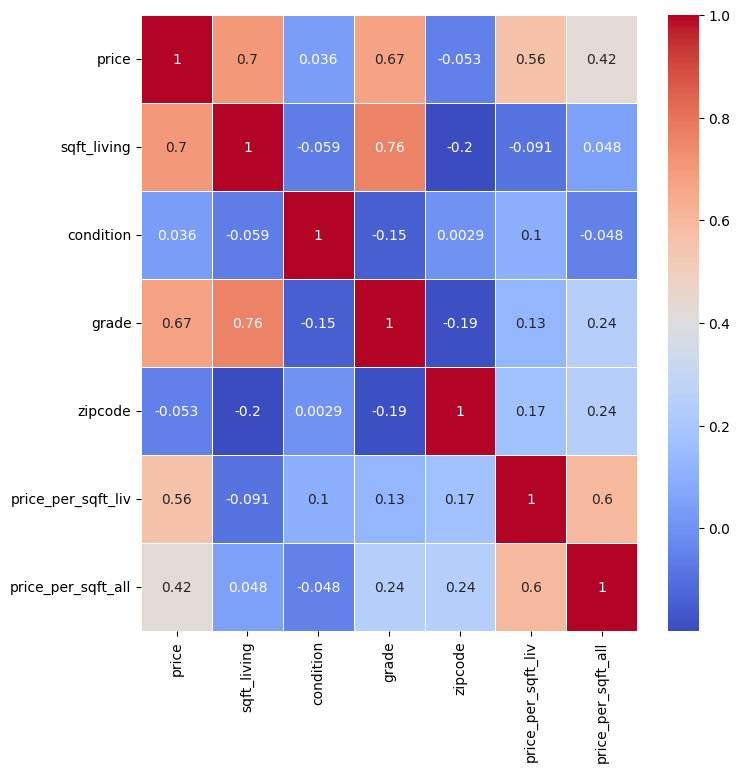

In [8]:
corr_columns = ["price", "sqft_living", "condition", "grade", "zipcode", "price_per_sqft_liv", "price_per_sqft_all"]
corr_mtrx=df[corr_columns].corr()
plt.figure(figsize = (8,8))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

In [9]:
df.zipcode.nunique()

70

In [10]:
zipcode_table = df.groupby('zipcode')[['price', 'sqft_living15','sqft_lot15']].mean()
zipcode_table

,price,sqft_living15,sqft_lot15
zipcode,,,
98001,281194.870,1830.100,11218.875
98002,234284.035,1479.030,7585.482
98003,294111.279,1876.196,9746.179
98004,1356523.991,2674.700,12805.022
98005,810289.696,2567.863,18367.774
...,...,...,...
98177,676419.392,2186.196,11690.239
98178,310612.756,1648.817,8149.641
98188,289078.346,1636.279,9752.801


In [11]:
zipcode_table.columns

Index(['price', 'sqft_living15', 'sqft_lot15'], dtype='object')

In [12]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'price_per_sqft_liv', 'price_per_sqft_all'],
      dtype='object')

NameError: name 'df_98000' is not defined

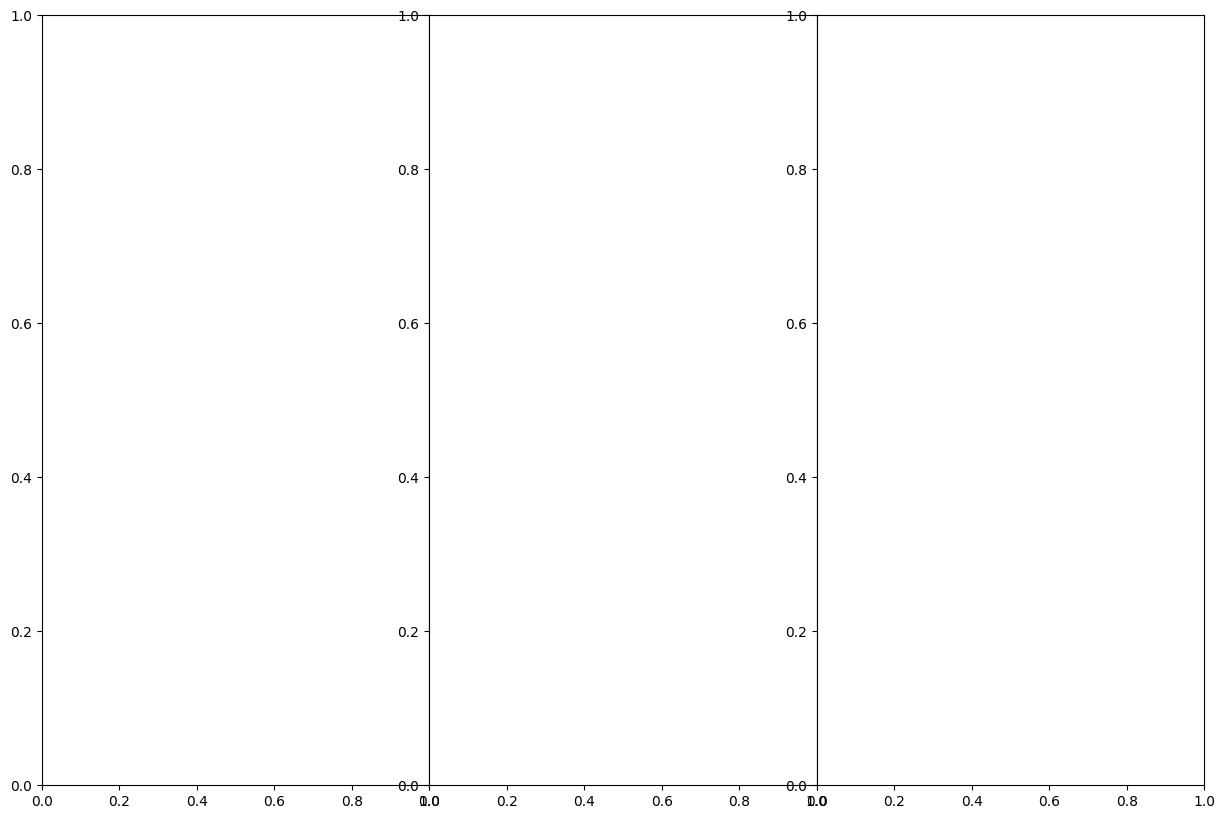

In [13]:
fig, axes = plt.subplots(1,3, figsize=(15, 10))
fig.subplots_adjust(left=None,
                       bottom=None,
                       right=None,
                       top=None,
                       wspace=0,
                       hspace=0)
ax1 = sns.scatterplot(data=df_98000, x='long', y='lat', hue='zipcode', palette='Paired', legend=False, ax=axes[0])
ax2 = sns.scatterplot(data=df_98100, x='long', y='lat', hue='zipcode', palette='Paired', legend=False, ax=axes[1])
ax3 = sns.scatterplot(data=df_98150, x='long', y='lat', hue='zipcode', palette='Paired', legend=False, ax=axes[2])
ax1.set_xlim([-122.6, -121.2])
ax1.set_ylim([47.1, 47.8])
ax2.set_xlim([-122.6, -121.2])
ax2.set_ylim([47.1, 47.8])
ax3.set_xlim([-122.6, -121.2])
ax3.set_ylim([47.1, 47.8])


<Axes: xlabel='long', ylabel='lat'>

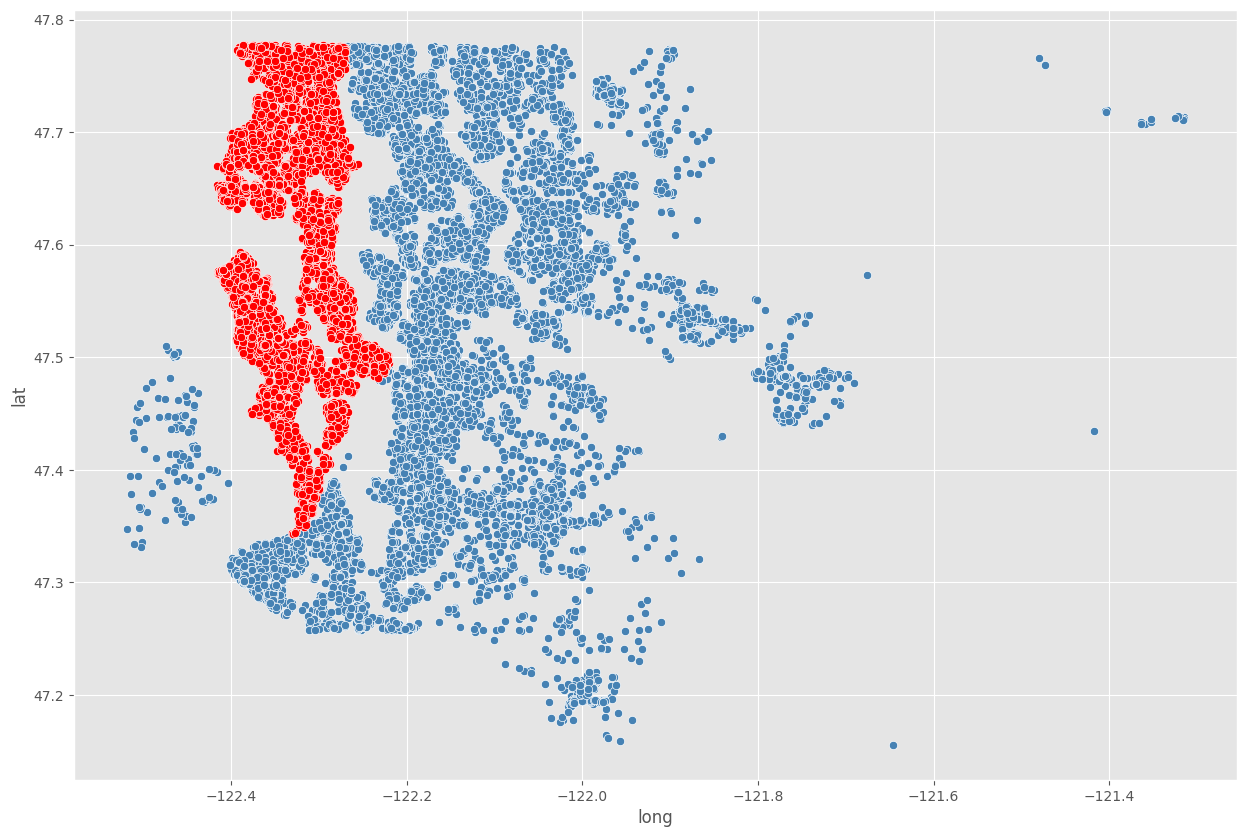

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(10, 10))
fig.subplots_adjust(left=None,
                       bottom=None,
                       right=None,
                       top=None,
                       wspace=0,
                       hspace=0)
sns.scatterplot(data=df_98000, x='long', y='lat', color = 'steelblue', palette='Paired', legend=False)
sns.scatterplot(data=df_98100, x='long', y='lat', color = 'red', palette='Paired', legend=False)




In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated'],
      dtype='object')

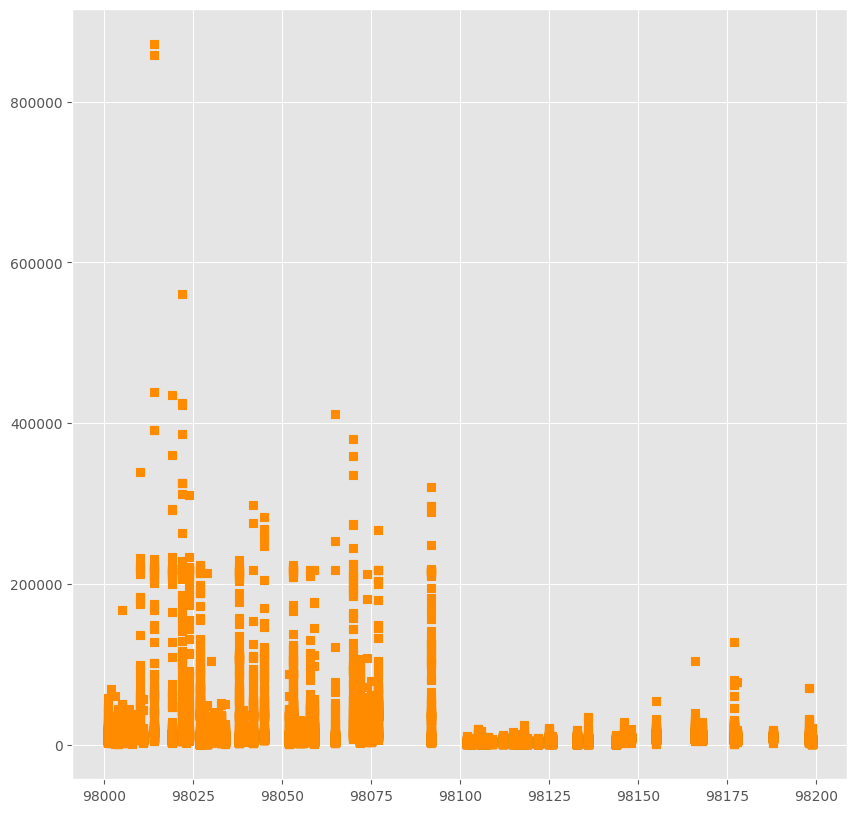

In [ ]:
plt.style.use('ggplot') 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
#ax.scatter(df.zipcode, df.sqft_living15, marker='s',color='steelblue', linewidths=0.8)
ax.scatter(df.zipcode, df.sqft_lot15, marker='s',color='darkorange', linewidths=0.8)
#ax.hist(df.zipcode, bins = 70)


zipcode 98000 - 98100 seems to be the country  
zipcode 98101 - 98200 seems to be the city

split the Dataframe

In [ ]:
df_98000 = df.query('zipcode < 98100')
df_98000

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,price_per_sqft_liv,price_per_sqft_all
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,False,0.000,...,1933,0,98028,47.738,-122.233,2720,8062,False,233.766,16.713
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,False,0.000,...,1987,0,98074,47.617,-122.045,1800,7503,False,303.571,52.254
5,7237550310,2014-05-12,1230000.000,4,4.500,5420,101930,1.000,False,0.000,...,2001,0,98053,47.656,-122.005,4760,101930,False,226.937,11.458
6,1321400060,2014-06-27,257500.000,3,2.250,1715,6819,2.000,False,0.000,...,1995,0,98003,47.310,-122.327,2238,6819,False,150.146,30.173
9,3793500160,2015-03-12,323000.000,3,2.500,1890,6560,2.000,False,0.000,...,2003,0,98038,47.368,-122.031,2390,7570,False,170.899,38.225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21584,249000205,2014-10-15,1540000.000,5,3.750,4470,8088,2.000,False,0.000,...,2008,0,98004,47.632,-122.200,2780,8964,False,344.519,122.631
21586,844000965,2014-06-26,224000.000,3,1.750,1500,11968,1.000,True,0.000,...,2014,0,98010,47.309,-122.002,1320,11303,False,149.333,16.632
21587,7852140040,2014-08-25,507250.000,3,2.500,2270,5536,2.000,True,0.000,...,2003,0,98065,47.539,-121.881,2270,5731,False,223.458,64.982
21589,3448900210,2014-10-14,610685.000,4,2.500,2520,6023,2.000,False,0.000,...,2014,0,98056,47.514,-122.167,2520,6023,False,242.335,71.484


In [ ]:
df_98100 = df.query('zipcode >= 98100')
df_98100

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,price_per_sqft_liv,price_per_sqft_all
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,True,0.000,...,1955,0,98178,47.511,-122.257,1340,5650,False,188.051,32.489
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,False,0.000,...,1951,1991,98125,47.721,-122.319,1690,7639,True,209.339,54.831
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,False,0.000,...,1965,0,98136,47.521,-122.393,1360,5000,False,308.163,86.782
7,2008000270,2015-01-15,291850.000,3,1.500,1060,9711,1.000,False,0.000,...,1963,0,98198,47.410,-122.315,1650,9711,False,275.330,27.096
8,2414600126,2015-04-15,229500.000,3,1.000,1780,7470,1.000,False,0.000,...,1960,0,98146,47.512,-122.337,1780,8113,False,128.933,24.811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2015-02-19,475000.000,3,2.500,1310,1294,2.000,False,0.000,...,2008,0,98116,47.577,-122.409,1330,1265,False,362.595,182.412
21592,263000018,2014-05-21,360000.000,3,2.500,1530,1131,3.000,False,0.000,...,2009,0,98103,47.699,-122.346,1530,1509,False,235.294,135.287
21593,6600060120,2015-02-23,400000.000,4,2.500,2310,5813,2.000,False,0.000,...,2014,0,98146,47.511,-122.362,1830,7200,False,173.160,49.243
21594,1523300141,2014-06-23,402101.000,2,0.750,1020,1350,2.000,False,0.000,...,2009,0,98144,47.594,-122.299,1020,2007,False,394.217,169.663


In [ ]:
zipcode_98100_df = df_98100.groupby('zipcode')[['zipcode','sqft_lot15']].max()
zipcode_98100_df = zipcode_98100_df.reset_index(drop=True)
zipcode_98100_df.rename(columns={"sqft_lot15": "sqft_lot15_max",}, inplace=True)

zipcode_98000_df = df_98000.groupby('zipcode')[['zipcode','sqft_lot15']].max()
zipcode_98000_df = zipcode_98000_df.reset_index(drop=True)
zipcode_98000_df.rename(columns={"sqft_lot15": "sqft_lot15_max",}, inplace=True)

zipcode_98000_df

,zipcode,sqft_lot15_max
0,98001,57934
1,98002,69993
2,98003,60513
3,98004,44584
4,98005,167378
5,98006,44374
6,98007,44431
7,98008,37846
8,98010,339332
9,98011,56628


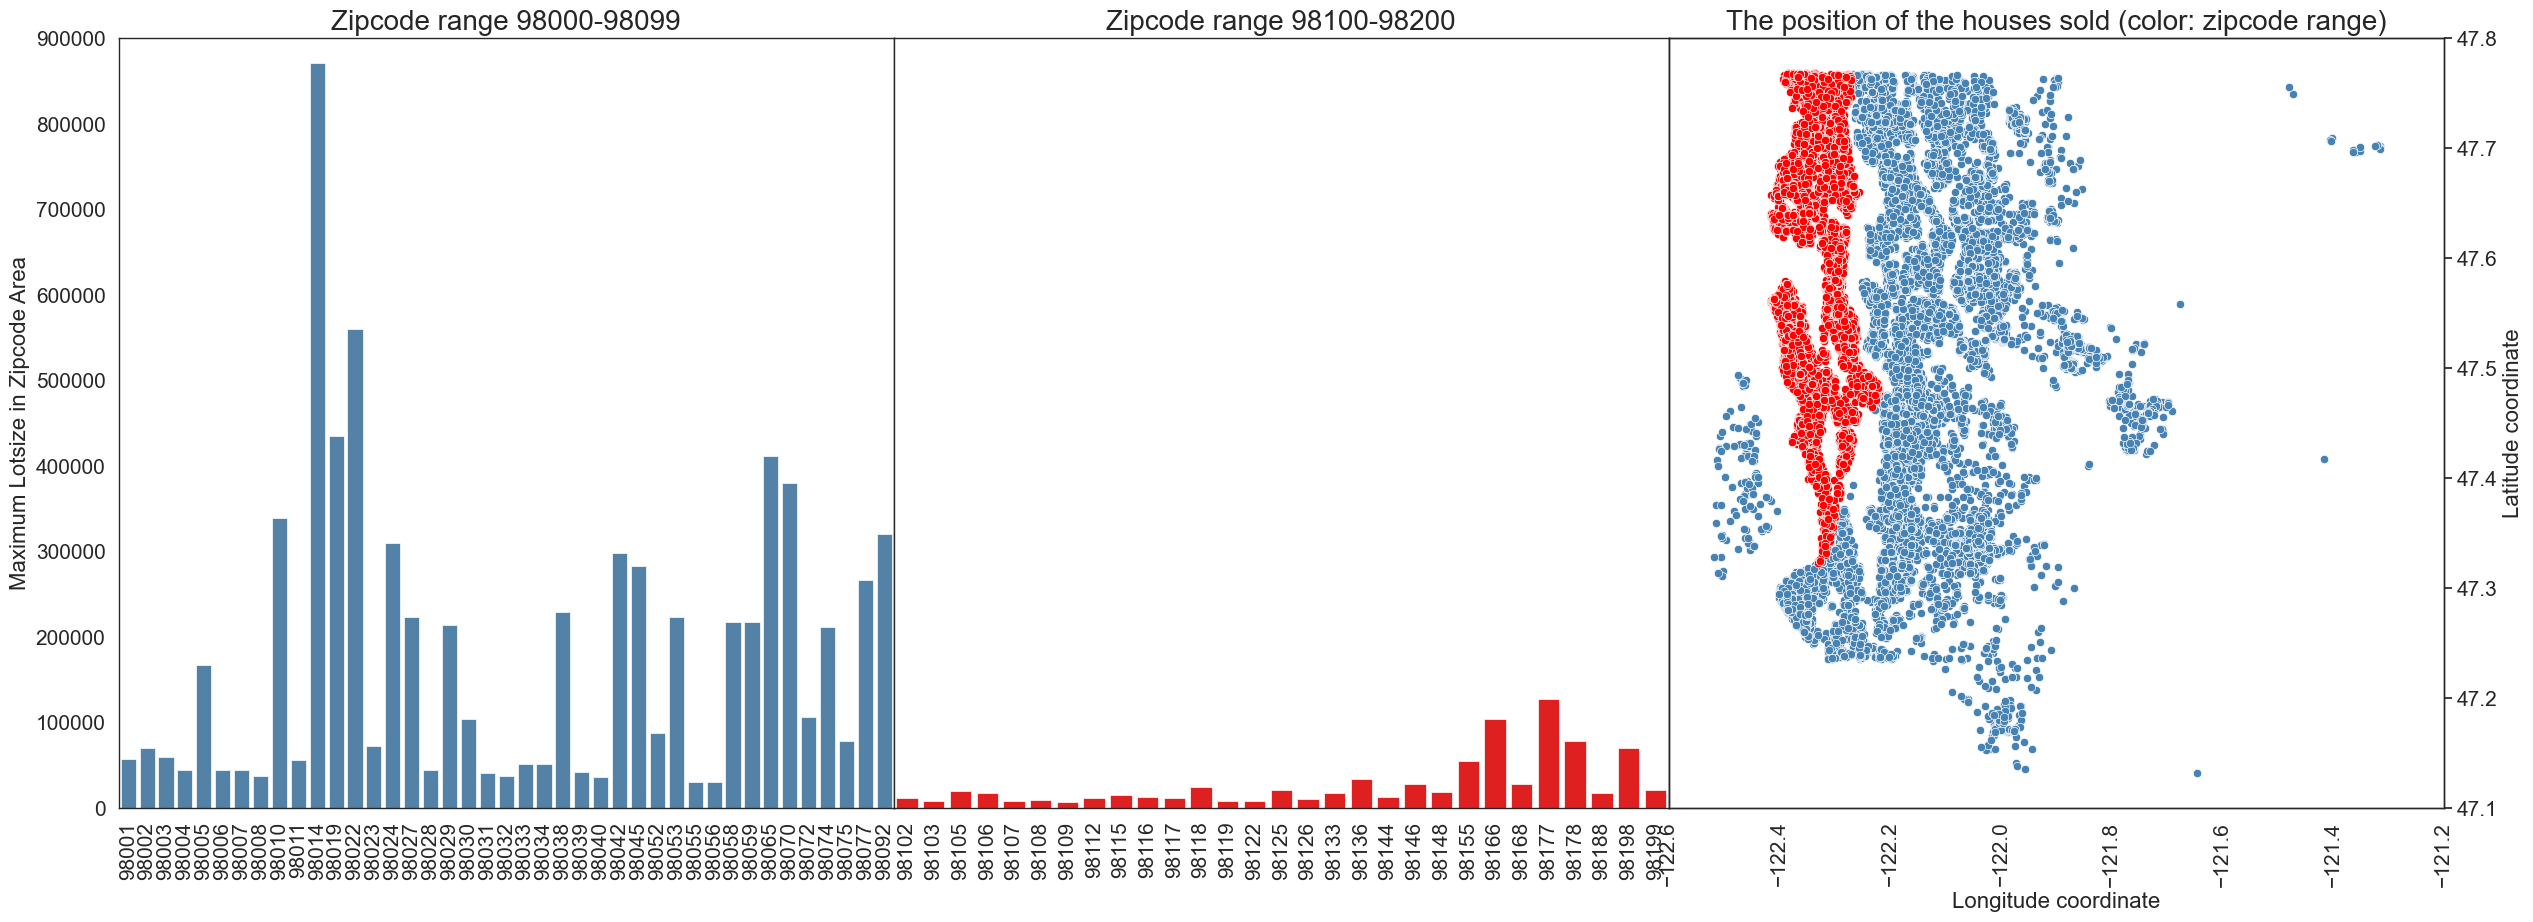

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(30, 10))
fig.subplots_adjust(left=None,
                       bottom=None,
                       right=None,
                       top=None,
                       wspace=0,
                       hspace=0)
sns.set_style('white')
ax10 = sns.barplot(data=zipcode_98000_df, x='zipcode', y='sqft_lot15_max', color='steelblue', ax=axes[0])
ax11 = sns.barplot(data=zipcode_98100_df, x='zipcode', y='sqft_lot15_max', color='red', ax=axes[1])
ax10.set_ylim([0, 900000])
ax11.set_ylim([0, 900000])
ax11.get_yaxis().set_visible(False)
ax10.set_xticklabels(ax10.get_xticklabels(), rotation=90)
ax11.set_xticklabels(ax11.get_xticklabels(), rotation=90)
ax10.tick_params(labelsize=15)
ax11.tick_params(labelsize=15)
ax10.set_ylabel("Maximum Lotsize in Zipcode Area", fontsize=16)
ax10.set_title("Zipcode range 98000-98099", fontsize=20)
ax11.set_title("Zipcode range 98100-98200", fontsize=20)
ax10.set_xlabel(" ", fontsize=6)
ax11.set_xlabel(" ", fontsize=6)

ax20 = sns.scatterplot(data=df_98000, x='long', y='lat', color='steelblue',legend=False, ax=axes[2])
ax21 = sns.scatterplot(data=df_98100, x='long', y='lat', color='red',legend=False, ax=axes[2])
ax02 = ax20.twinx()
ax02.set_xlim([-122.6, -121.2])
ax02.set_ylim([47.1, 47.8])
ax20.get_yaxis().set_visible(False)
ax21.get_yaxis().set_visible(False)
ax02.set_ylabel("Latitude coordinate", fontsize=16)
ax21.set_xlabel("Longitude coordinate", fontsize=16)
ax02.tick_params(labelsize=15)
ax21.tick_params(labelsize=15)
ax21.set_xticklabels(ax21.get_xticklabels(), rotation=90)
ax21.set_title("The position of the houses sold (color: zipcode range)", fontsize=20)
#ax10.xticks(x, labels)

plt.savefig('plot_pictures/plot_sqft_15_location.png', dpi='figure')

Code von Chat gpt, aber coole Darstellung

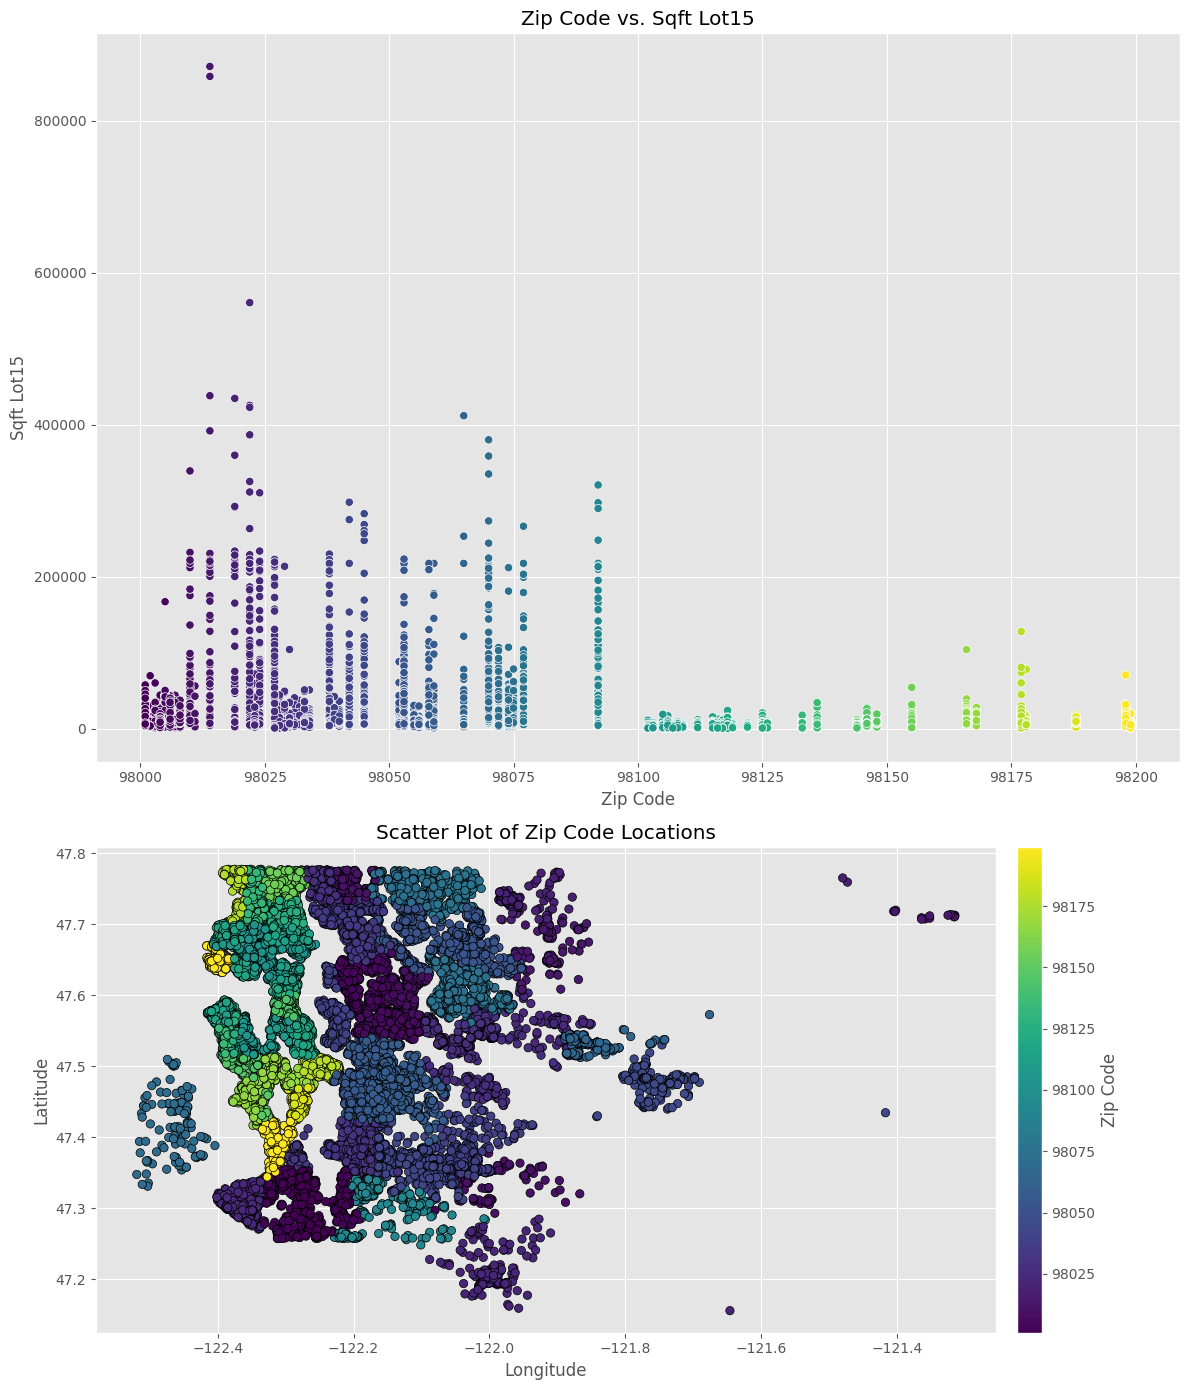

In [ ]:
# Set up the figure and axis for the subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 14), gridspec_kw={'height_ratios': [3, 2]})

# Plot 1: Zip Code vs. Sqft Living15
sns.scatterplot(x='zipcode', y='sqft_lot15', data=df, ax=ax1, hue='zipcode', palette='viridis', legend=False)
ax1.set_title('Zip Code vs. Sqft Lot15')
ax1.set_xlabel('Zip Code')
ax1.set_ylabel('Sqft Lot15')

# Plot 2: Scatter Plot of Zip Code Locations
scatter = ax2.scatter(df['long'], df['lat'], c=df['zipcode'], cmap='viridis', edgecolors='black')
ax2.set_title('Scatter Plot of Zip Code Locations')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

# Add colorbar for the second plot
cbar = plt.colorbar(scatter, ax=ax2, orientation='vertical', pad=0.02)
cbar.set_label('Zip Code')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()

## Price

price/sqft  

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated'],
      dtype='object')

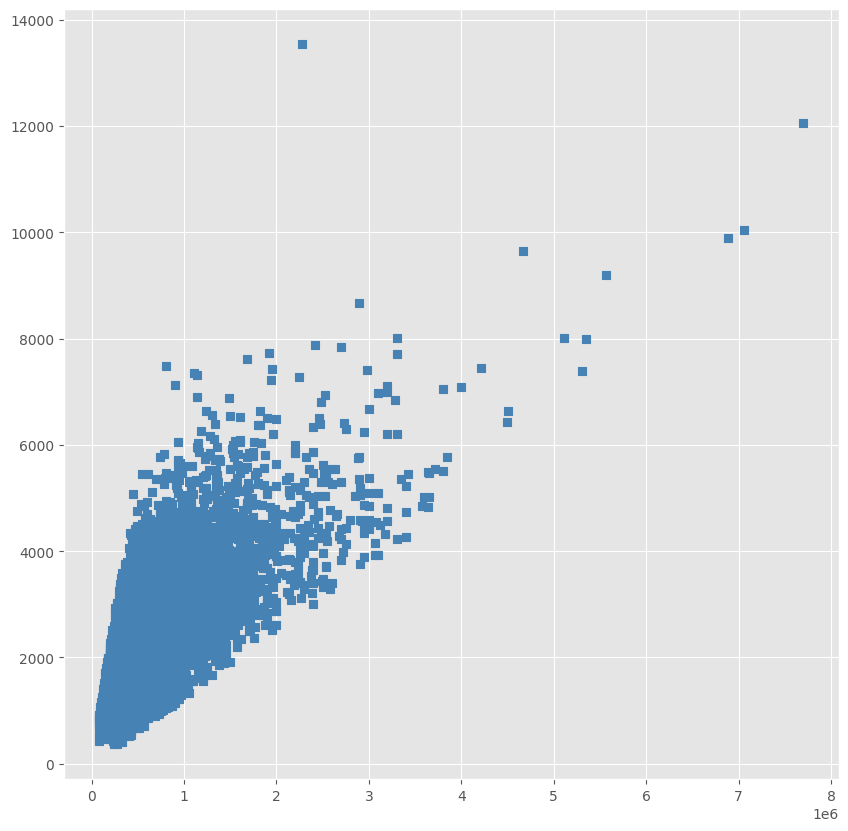

In [ ]:
plt.style.use('ggplot') 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(df.price, df.sqft_living, marker='s',color='steelblue', linewidths=0.8)
#ax.scatter(df.price, df.sqft_lot, marker='s',color='steelblue', linewidths=0.8)


## Stadthaus

kriterien:
* minimum 2 bedrooms
* minimum 2 bathrooms
* younger than 15years or renovated

In [ ]:
df_98100.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'price_per_sqft_liv', 'price_per_sqft_all'],
      dtype='object')

In [ ]:
df_city_houses = df_98100.query('bedrooms >=2')
df_city_houses = df_city_houses.query('bathrooms >=2')
df_city_houses = df_city_houses.query('yr_built >=2000 or yr_renovated >=2000')
df_city_houses

Ich moechte den price abhaengig von Grade darstellen, brauche min, max, median, und dann als bar-plot

In [ ]:
price_grade_min_98100_df = df_98100.groupby('grade')[['grade','price']].min()
price_grade_min_98100_df = price_grade_min_98100_df.reset_index(drop=True)
price_grade_min_98100_df.rename({'price':'price_min'}, axis=1, inplace=True)
price_grade_max_98100_df = df_98100.groupby('grade')[['grade','price']].max()
price_grade_max_98100_df.rename({'price':'price_max'}, axis=1, inplace=True)
price_grade_max_98100_df = price_grade_max_98100_df.reset_index(drop=True)
price_grade_median_98100_df = df_98100.groupby('grade')[['grade','price']].median()
price_grade_median_98100_df.rename({'price':'price_median'}, axis=1, inplace=True)
price_grade_median_98100_df = price_grade_median_98100_df.reset_index(drop=True)


In [ ]:
price_grade_98100_df = pd.merge(price_grade_min_98100_df, price_grade_max_98100_df, on=['grade'], how='left')
price_grade_98100_df = pd.merge(price_grade_98100_df, price_grade_median_98100_df, on=['grade'], how='left')
#price_grade_98100_df = price_grade_98100_df.query('grade < 13')
price_grade_98100_df

,grade,price_min,price_max,price_median
0,4,90000.000,325000.000,169500.000
1,5,78000.000,795000.000,236000.000
2,6,82000.000,975000.000,299000.000
3,7,95000.000,2050000.000,423000.000
4,8,149900.000,1950000.000,559950.000
5,9,230000.000,2550000.000,871000.000
6,10,380000.000,3600000.000,1260000.000
7,11,710000.000,3650000.000,1680000.000
8,12,1580000.000,4500000.000,2250000.000
9,13,2420000.000,7700000.000,3045000.000


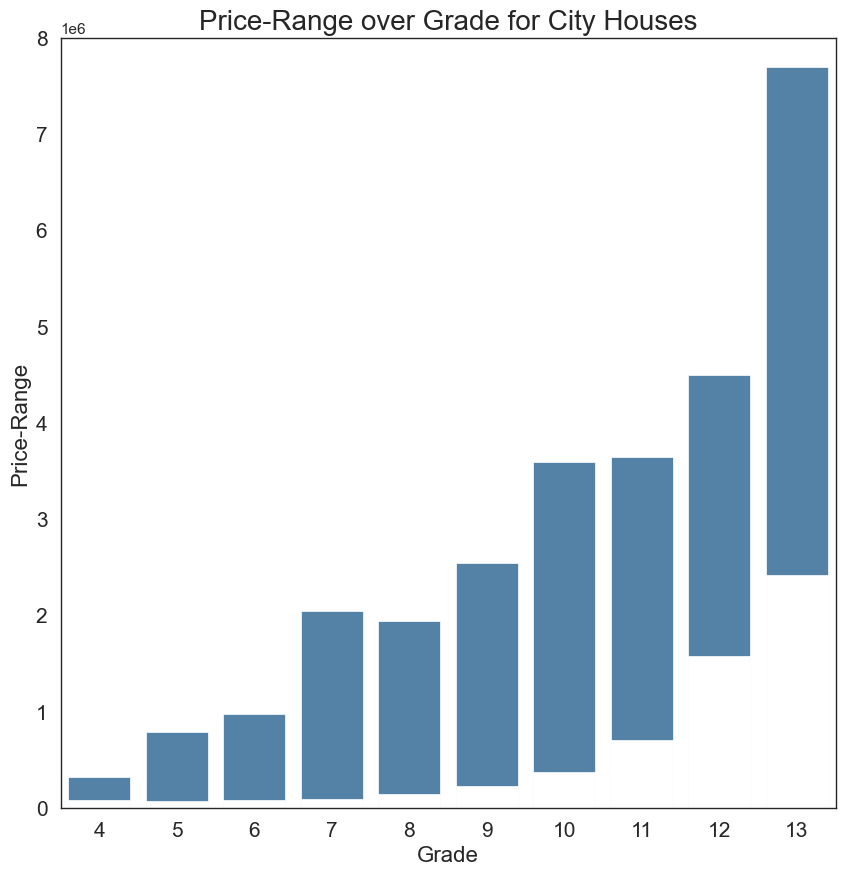

In [ ]:
plt.style.use('ggplot') 
sns.set_style('white')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax1=sns.barplot(data=price_grade_98100_df, x='grade', y='price_max', color='steelblue')
#ax2=sns.barplot(data=price_grade_98100_df, x='grade', y='price_median', color='red')
ax3=sns.barplot(data=price_grade_98100_df, x='grade', y='price_min', color='white')
#ax.set_xticklabels(month, rotation=30, fontsize=10)
ax.set_title("Price-Range over Grade for City Houses", fontsize=20)
ax.set_xlabel("Grade", fontsize=16)
ax.set_ylabel("Price-Range", fontsize=16)
ax.set_ylim([0, 8000000])
ax.tick_params(labelsize=15)


plt.savefig('plot_pictures/plot_price_grad_city_houses.png', dpi='figure');

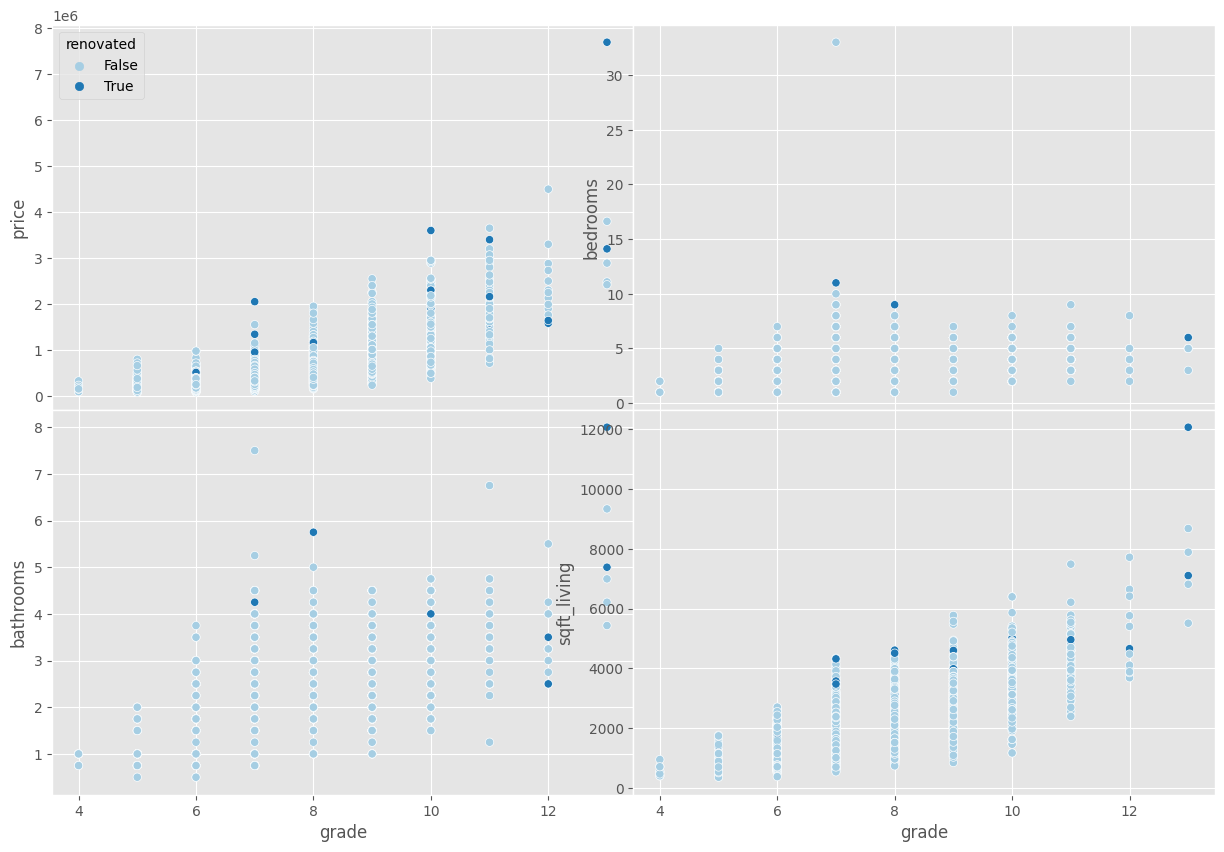

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(15, 10))
fig.subplots_adjust(left=None,
                       bottom=None,
                       right=None,
                       top=None,
                       wspace=0,
                       hspace=0)

ax1 = sns.scatterplot(data=df_98100, x='grade', y='price', hue='renovated', palette='Paired', legend=True, ax=axes[0][0])
ax2 = sns.scatterplot(data=df_98100, x='grade', y='bedrooms', hue='renovated', palette='Paired', legend=False, ax=axes[0][1])
ax3 = sns.scatterplot(data=df_98100, x='grade', y='bathrooms', hue='renovated', palette='Paired', legend=False, ax=axes[1][0])
ax4 = sns.scatterplot(data=df_98100, x='grade', y='sqft_living', hue='renovated', palette='Paired', legend=False, ax=axes[1][1])
#ax.scatter(df_98100.grade, df_98100.price, marker='s',color='steelblue', linewidths=0.8)


#ax.scatter(df.price, df.sqft_lot, marker='s',color='steelblue', linewidths=0.8)

## Landhaus

kriterien:
* NOT renovated
* grade - what do we get for the special grades? How much sqft, price, bedrroms, bathrooms
* sqft_living
* bathrooms

In [ ]:
df_98000.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'price_per_sqft_liv', 'price_per_sqft_all'],
      dtype='object')

In [ ]:
df_98000_nonrev = df_98000.query('yr_renovated == 0')
df_98000_nonrev

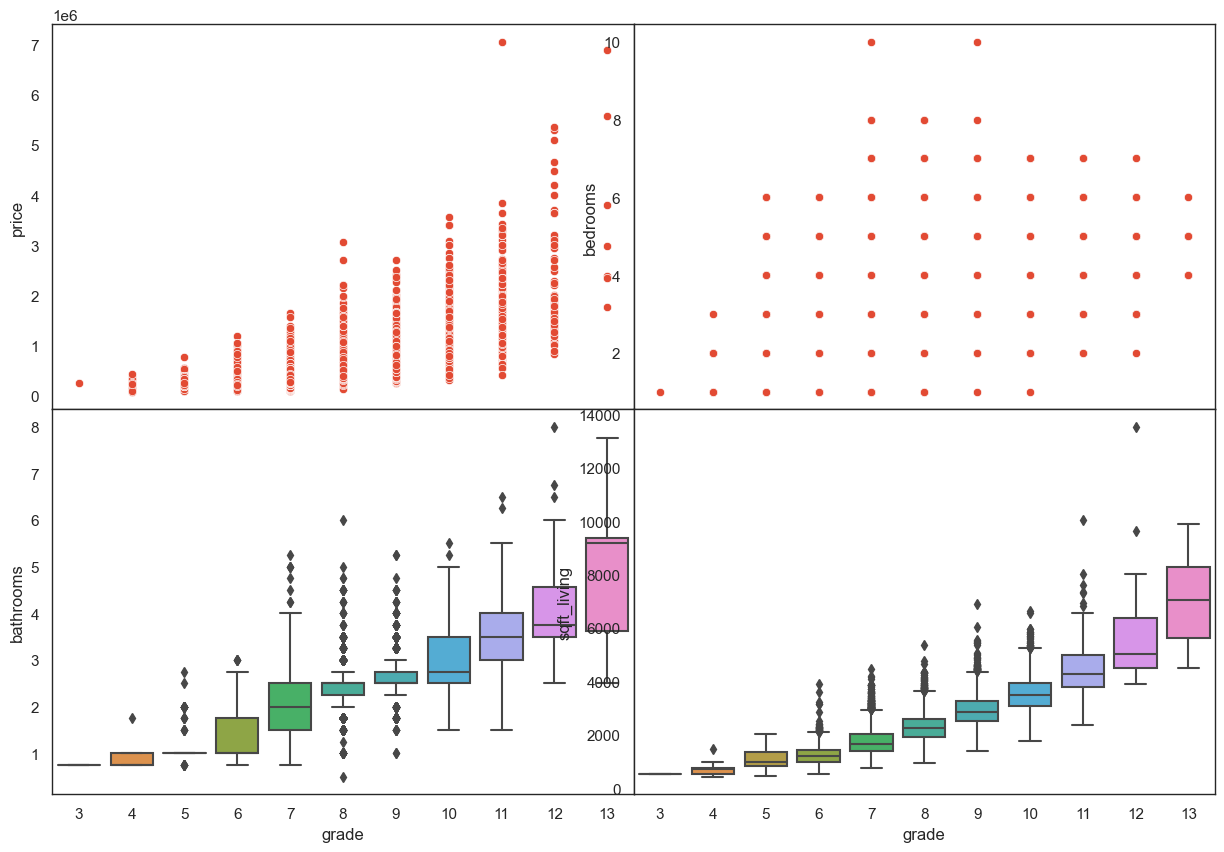

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(15, 10))
fig.subplots_adjust(left=None,
                       bottom=None,
                       right=None,
                       top=None,
                       wspace=0,
                       hspace=0)

ax1 = sns.scatterplot(data=df_98000, x='grade', y='price', palette='Paired', ax=axes[0][0])
ax2 = sns.scatterplot(data=df_98000, x='grade', y='bedrooms', ax=axes[0][1])
ax3 = sns.boxplot(data=df_98000, x='grade', y='bathrooms', ax=axes[1][0])
ax4 = sns.boxplot(data=df_98000, x='grade', y='sqft_living', ax=axes[1][1])


Time to get a Budget:  

Maximum $1.000.000 for the Cityhouse

In [ ]:
df_98100_1Million = df_98100.query('750000 <= price <= 1000000')
df_98100_1Million

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,price_per_sqft_liv,price_per_sqft_all
26,1794500383,2014-06-26,937000.000,3,1.750,2450,2691,2.000,False,0.000,...,1915,0,98119,47.639,-122.360,1760,3573,False,382.449,182.260
41,7766200013,2014-08-11,775000.000,4,2.250,4220,24186,1.000,False,0.000,...,1984,0,98166,47.445,-122.347,2410,30617,False,183.649,27.283
54,4217401195,2015-03-03,920000.000,5,2.250,2730,6000,1.500,False,0.000,...,1927,0,98105,47.657,-122.281,2730,6000,False,336.996,105.384
55,9822700295,2014-05-12,885000.000,4,2.500,2830,5000,2.000,True,0.000,...,1995,0,98105,47.660,-122.290,1950,5000,False,312.721,113.027
85,4232902595,2014-11-14,940000.000,3,1.500,2140,3600,2.000,False,0.000,...,1925,0,98119,47.634,-122.365,2020,4800,False,439.252,163.763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21288,4385700185,2014-08-12,799950.000,3,2.250,1860,1386,3.000,False,0.000,...,2014,0,98112,47.637,-122.279,1680,3080,False,430.081,246.442
21301,1732800199,2015-05-11,935000.000,2,2.500,1680,977,3.000,False,0.000,...,2009,0,98119,47.632,-122.361,1680,977,False,556.548,351.901
21334,6132600655,2014-10-16,930000.000,3,2.250,2890,5000,3.000,False,0.000,...,2014,0,98117,47.698,-122.389,2020,5000,False,321.799,117.871
21379,3879900754,2014-09-15,779000.000,3,2.500,1580,1487,3.000,False,1.000,...,2009,0,98119,47.628,-122.359,1610,1297,False,493.038,253.994


Was bekommen wir in der Preisrange?  
* grad
* bathrooms
* bedrooms
* sqft_liv
* renovated oder nicht älter als 15 Jahre
* basement ?

In [ ]:
df_98100_1Million.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'price_per_sqft_liv', 'price_per_sqft_all'],
      dtype='object')

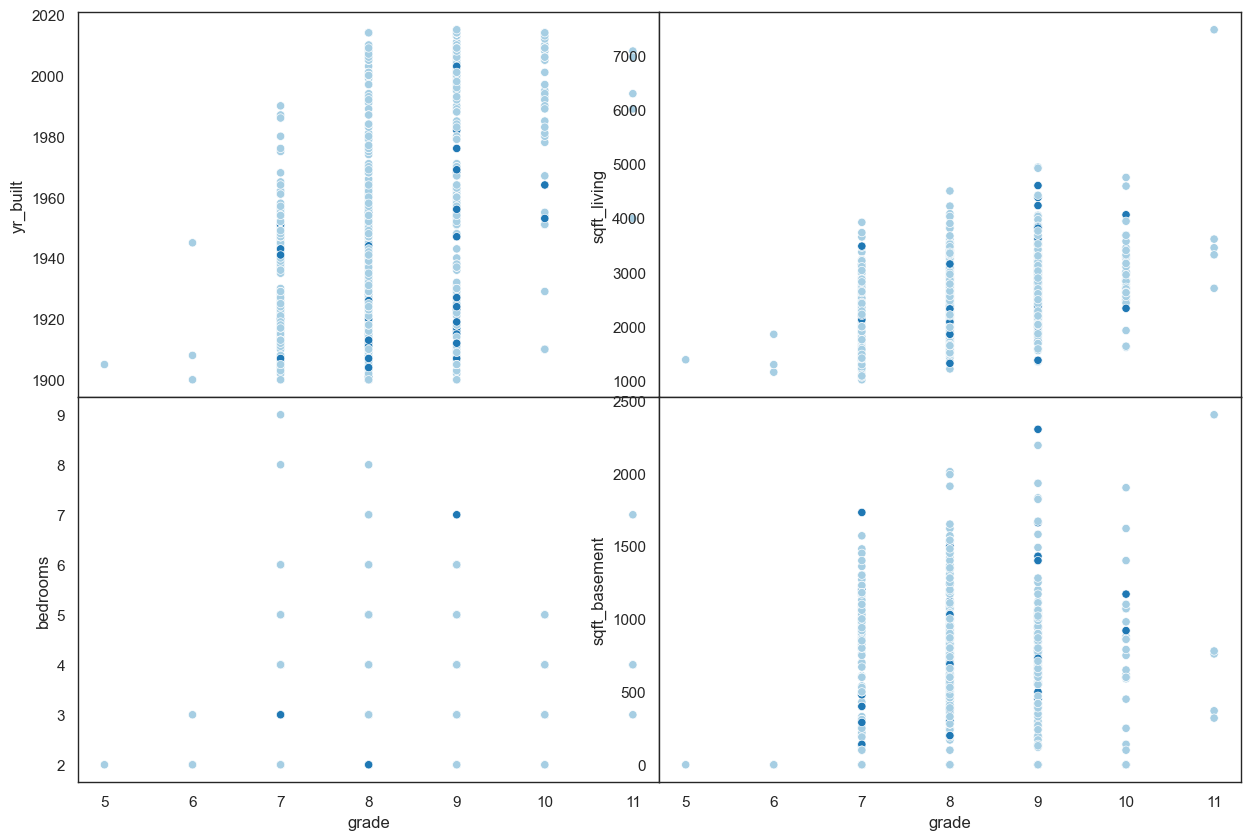

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(15, 10))
fig.subplots_adjust(left=None,
                       bottom=None,
                       right=None,
                       top=None,
                       wspace=0,
                       hspace=0)

ax1 = sns.scatterplot(data=df_98100_1Million, x='grade', y='yr_built', hue='renovated', palette='Paired', legend=False, ax=axes[0][0])
ax1 = sns.scatterplot(data=df_98100_1Million, x='grade', y='bedrooms', hue='renovated', palette='Paired', legend=False, ax=axes[1][0])
ax1 = sns.scatterplot(data=df_98100_1Million, x='grade', y='sqft_living', hue='renovated', palette='Paired', legend=False, ax=axes[0][1])
ax1 = sns.scatterplot(data=df_98100_1Million, x='grade', y='sqft_basement', hue='renovated', palette='Paired', legend=False, ax=axes[1][1])

In [ ]:
price_grade_min_98000_df = df_98000.groupby('grade')[['grade','price']].min()
price_grade_min_98000_df = price_grade_min_98000_df.reset_index(drop=True)
price_grade_min_98000_df.rename({'price':'price_min'}, axis=1, inplace=True)
price_grade_max_98000_df = df_98000.groupby('grade')[['grade','price']].max()
price_grade_max_98000_df.rename({'price':'price_max'}, axis=1, inplace=True)
price_grade_max_98000_df = price_grade_max_98000_df.reset_index(drop=True)

In [ ]:
price_grade_98000_df = pd.merge(price_grade_min_98000_df, price_grade_max_98000_df, on=['grade'], how='left')
#price_grade_98100_df = price_grade_98100_df.query('grade < 13')
price_grade_98000_df

,grade,price_min,price_max
0,3,262000.000,262000.000
1,4,80000.000,435000.000
2,5,85000.000,775000.000
3,6,85000.000,1200000.000
4,7,90000.000,1650000.000
5,8,140000.000,3070000.000
6,9,257000.000,2700000.000
7,10,316000.000,3570000.000
8,11,420000.000,7060000.000
9,12,835000.000,5350000.000


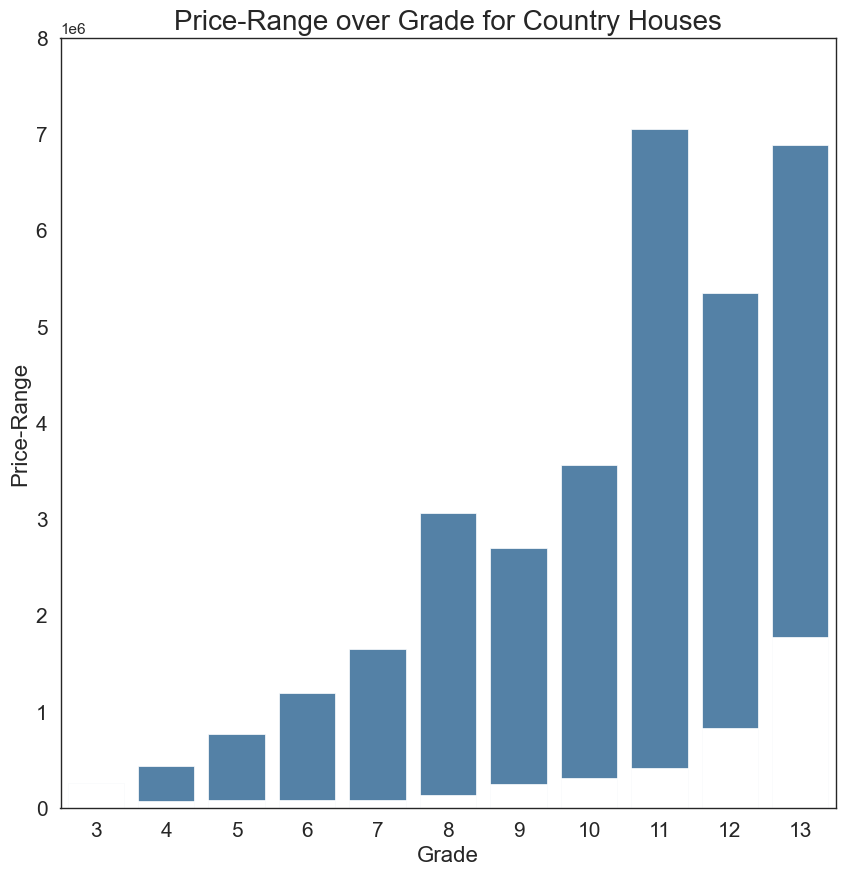

In [ ]:
plt.style.use('ggplot') 
sns.set_style('white')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax1=sns.barplot(data=price_grade_98000_df, x='grade', y='price_max', color='steelblue')
#ax2=sns.barplot(data=price_grade_98100_df, x='grade', y='price_median', color='red')
ax3=sns.barplot(data=price_grade_98000_df, x='grade', y='price_min', color='white')
#ax.set_xticklabels(month, rotation=30, fontsize=10)
ax.set_title("Price-Range over Grade for Country Houses", fontsize=20)
ax.set_xlabel("Grade", fontsize=16)
ax.set_ylabel("Price-Range", fontsize=16)
ax.set_ylim([0, 8000000])
ax.tick_params(labelsize=15)


plt.savefig('plot_pictures/plot_price_grad_country_houses.png', dpi='figure');

Mean monthly price over the year for the nonrenovated country house 

In [ ]:
df_98000_nonrev['just_month'] = df_98000_nonrev['date'].dt.strftime('%Y-%m')
df_98000_nonrev['month_name'] = df_98000_nonrev['date'].dt.strftime('%b')
df_98000_nonrev.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,price_per_sqft_liv,price_per_sqft_all,just_month,month_name
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,False,0.000,...,98028,47.738,-122.233,2720,8062,False,233.766,16.713,2015-02,Feb
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,False,0.000,...,98074,47.617,-122.045,1800,7503,False,303.571,52.254,2015-02,Feb
5,7237550310,2014-05-12,1230000.000,4,4.500,5420,101930,1.000,False,0.000,...,98053,47.656,-122.005,4760,101930,False,226.937,11.458,2014-05,May
6,1321400060,2014-06-27,257500.000,3,2.250,1715,6819,2.000,False,0.000,...,98003,47.310,-122.327,2238,6819,False,150.146,30.173,2014-06,Jun
9,3793500160,2015-03-12,323000.000,3,2.500,1890,6560,2.000,False,0.000,...,98038,47.368,-122.031,2390,7570,False,170.899,38.225,2015-03,Mar


In [ ]:
price_month_01 = df_98000_nonrev.groupby('just_month')[['just_month', 'month_name']].min() 
#price_month_01.rename('month', inplace=True)
price_month_01

,just_month,month_name
just_month,,
2014-05,2014-05,May
2014-06,2014-06,Jun
2014-07,2014-07,Jul
2014-08,2014-08,Aug
2014-09,2014-09,Sep
2014-10,2014-10,Oct
2014-11,2014-11,Nov
2014-12,2014-12,Dec
2015-01,2015-01,Jan


In [ ]:
price_month_02 = df_98000_nonrev.groupby('just_month')['price'].median() 
price_month_02

just_month
2014-05   465000.000
2014-06   471000.000
2014-07   463000.000
2014-08   445000.000
2014-09   445950.000
2014-10   440000.000
2014-11   430000.000
2014-12   420000.000
2015-01   435000.000
2015-02   415000.000
2015-03   447750.000
2015-04   467000.000
2015-05   453765.000
Name: price, dtype: float64

In [ ]:
price_month = pd.concat([price_month_01, price_month_02], axis=1, join='outer')
price_month = price_month.reset_index(drop=True) 
price_month

,just_month,month_name,price
0,2014-05,May,465000.000
1,2014-06,Jun,471000.000
2,2014-07,Jul,463000.000
3,2014-08,Aug,445000.000
4,2014-09,Sep,445950.000
5,2014-10,Oct,440000.000
6,2014-11,Nov,430000.000
7,2014-12,Dec,420000.000
8,2015-01,Jan,435000.000
9,2015-02,Feb,415000.000


In [ ]:
month = price_month.month_name.to_list()
month

['May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Jan',
 'Feb',
 'Mar',
 'Apr',
 'May']

In [ ]:
ax20 = sns.scatterplot(data=df_98000, x='long', y='lat', color='steelblue',legend=False, ax=axes[2])
ax21 = sns.scatterplot(data=df_98100, x='long', y='lat', color='red',legend=False, ax=axes[2])
ax02 = ax20.twinx()
ax02.set_xlim([-122.6, -121.2])
ax02.set_ylim([47.1, 47.8])
ax20.get_yaxis().set_visible(False)
ax21.get_yaxis().set_visible(False)
ax02.set_ylabel("Latitude coordinate", fontsize=16)
ax21.set_xlabel("Longitude coordinate", fontsize=16)
ax02.tick_params(labelsize=15)
ax21.tick_params(labelsize=15)
ax21.set_xticklabels(ax21.get_xticklabels(), rotation=90)
ax21.set_title("The position of the houses sold (color: zipcode range)", fontsize=20)
#ax10.xticks(x, labels)

plt.savefig('plot_pictures/plot_price_over_time.png', dpi='figure')

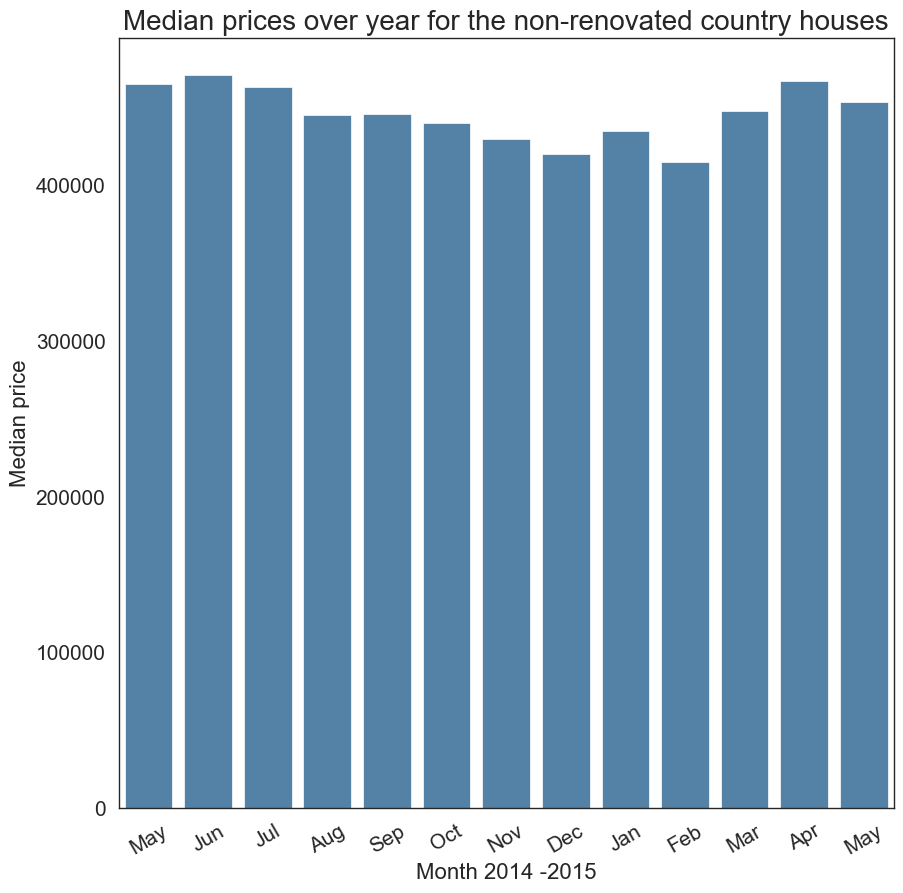

In [ ]:
plt.style.use('ggplot') 
sns.set_style('white')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
sns.barplot(data=price_month, x='just_month', y='price', color='steelblue')
ax.set_xticklabels(month, rotation=30, fontsize=10)
ax.set_title("Median prices over year for the non-renovated country houses", fontsize=20)
ax.set_xlabel("Month 2014 -2015", fontsize=16)
ax.set_ylabel("Median price", fontsize=16)
ax.tick_params(labelsize=15)


plt.savefig('plot_pictures/plot_price_over_time.png', dpi='figure');

Esters Code

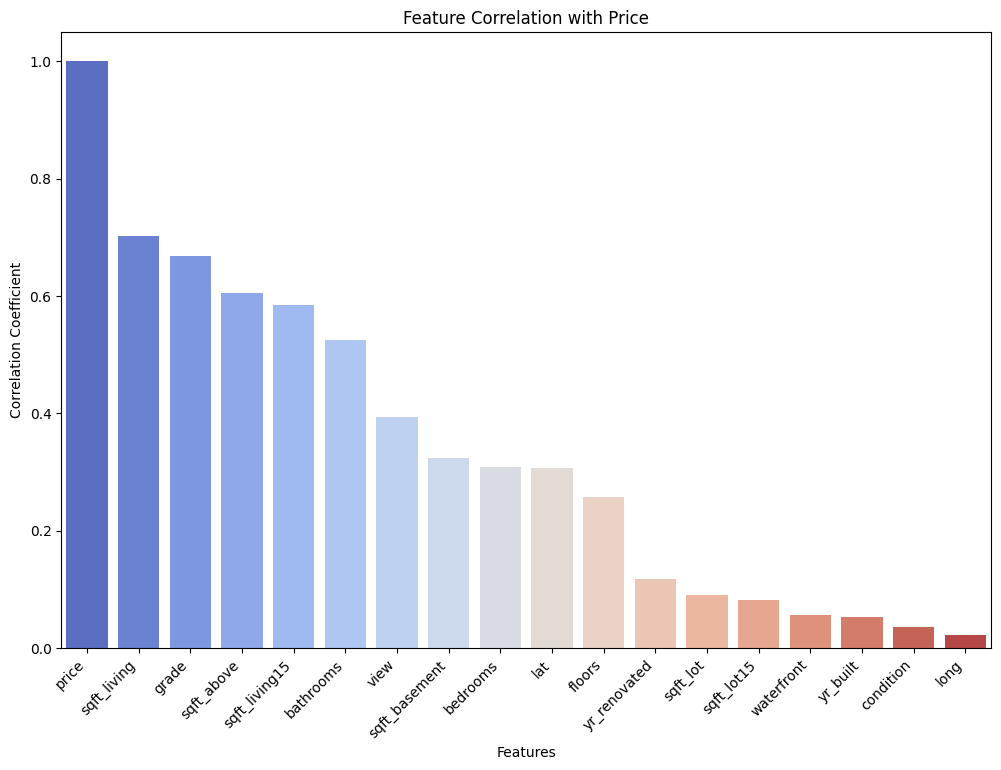

In [14]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                      'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
                      'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']
df_selected = df[selected_features]
correlation_matrix = df_selected.corr()
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_matrix['price'].sort_values(ascending=False).index,
            y=correlation_matrix['price'].sort_values(ascending=False),
            palette="coolwarm")
plt.title('Feature Correlation with Price')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha="right")
plt.show()